In [17]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [18]:
def print_digit(digit):
    pyplot.imshow(digit.reshape(28,28))

In [19]:
def control(new_centers, old_centers):
    res = 0.0
    for i in range(0, 10):
        res += np.linalg.norm(new_centers[i] - old_centers[i], 2)
    return res

In [20]:
def mean_vect(data, mets, old_centers):
    new_centers = []
    for i in range(0, 10):
        counter = 0.0
        res = np.array([0.0, 0.0])
        for j in xrange(0, 10000):
            if mets[j] == i:
                counter += 1
                res += data[j]
        if counter != 0.0:
            new_centers.append(res / counter)
        else:
            new_centers.append(old_centers[i])
    return new_centers

In [21]:
def kmeans (old_centers, mets, data):
    for i in xrange(0, 10000):
        mins = []
        for center in old_centers:
            mins.append(np.linalg.norm(data[i] - center, 2))
        mets[i] = mins.index(min(mins))

    return np.array(mean_vect(data, mets, old_centers))

In [22]:
def kmeans_plus_plus (data):
    centers = []
    while len(centers) != 10:
        new_center = data[np.random.randint(0, 9999)]
        distances = [sum( (new_center - data[i])**2 ) for i in xrange(0, 10000)]
        value = np.random.uniform(0.0, 1.0) * sum(distances)
        index = 0
        summ = 0.0
        while summ < value:
            summ += distances[index]
            index += 1
        centers.append(data[index])
    return np.array(centers)

In [23]:
data = pd.read_csv('learn.csv')

In [24]:
data = data.sample(10000, axis=0)
data = data.reset_index()

data = data.drop('index', 1)

answers = data['answer']
data = data.drop('answer', 1)

In [25]:
reduced_data = PCA(n_components=2).fit_transform(data)
clf_kmeans = KMeans(init='k-means++', n_clusters=10, n_init=60)
clf_kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=60, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
eps = 0.001

mets = np.arange(0, 10000)

In [27]:
#old_centers = np.array([reduced_data[np.random.randint(0, 9999)] for i in range(10)])
old_centers = kmeans_plus_plus(reduced_data)

new_centers = kmeans(old_centers, mets, reduced_data)

In [28]:
while control(new_centers, old_centers) > eps:
    old_centers = new_centers
    new_centers = kmeans(old_centers, mets, reduced_data)

In [29]:
c = np.array([i for i in xrange(0, 10000) if mets[i] == 1])

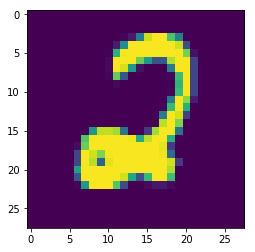

In [30]:
print_digit(data.iloc[c[8]].values)

In [31]:
summ = 0
for numb in range(0, 10):
    tmp_res = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in xrange(0, 10000):
        if mets[i] == numb:
            tmp_res[answers[i]] += 1
    index = tmp_res.index(max(tmp_res))
    summ += max(tmp_res)
print 'My result = ' + str(round(summ / 10000.0, 4))

summ = 0
answ = clf_kmeans.predict(reduced_data)
for numb in range(0, 10):
    tmp_res = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in xrange(0, 10000):
        if answ[i] == numb:
            tmp_res[answers[i]] += 1
    index = tmp_res.index(max(tmp_res))
    summ += max(tmp_res)

print 'SKLEARN result = ' + str(round(summ / 10000.0, 4))

My result = 0.408
SKLEARN result = 0.4084


## Не особо хорошая идея для выполнения данной задачи 

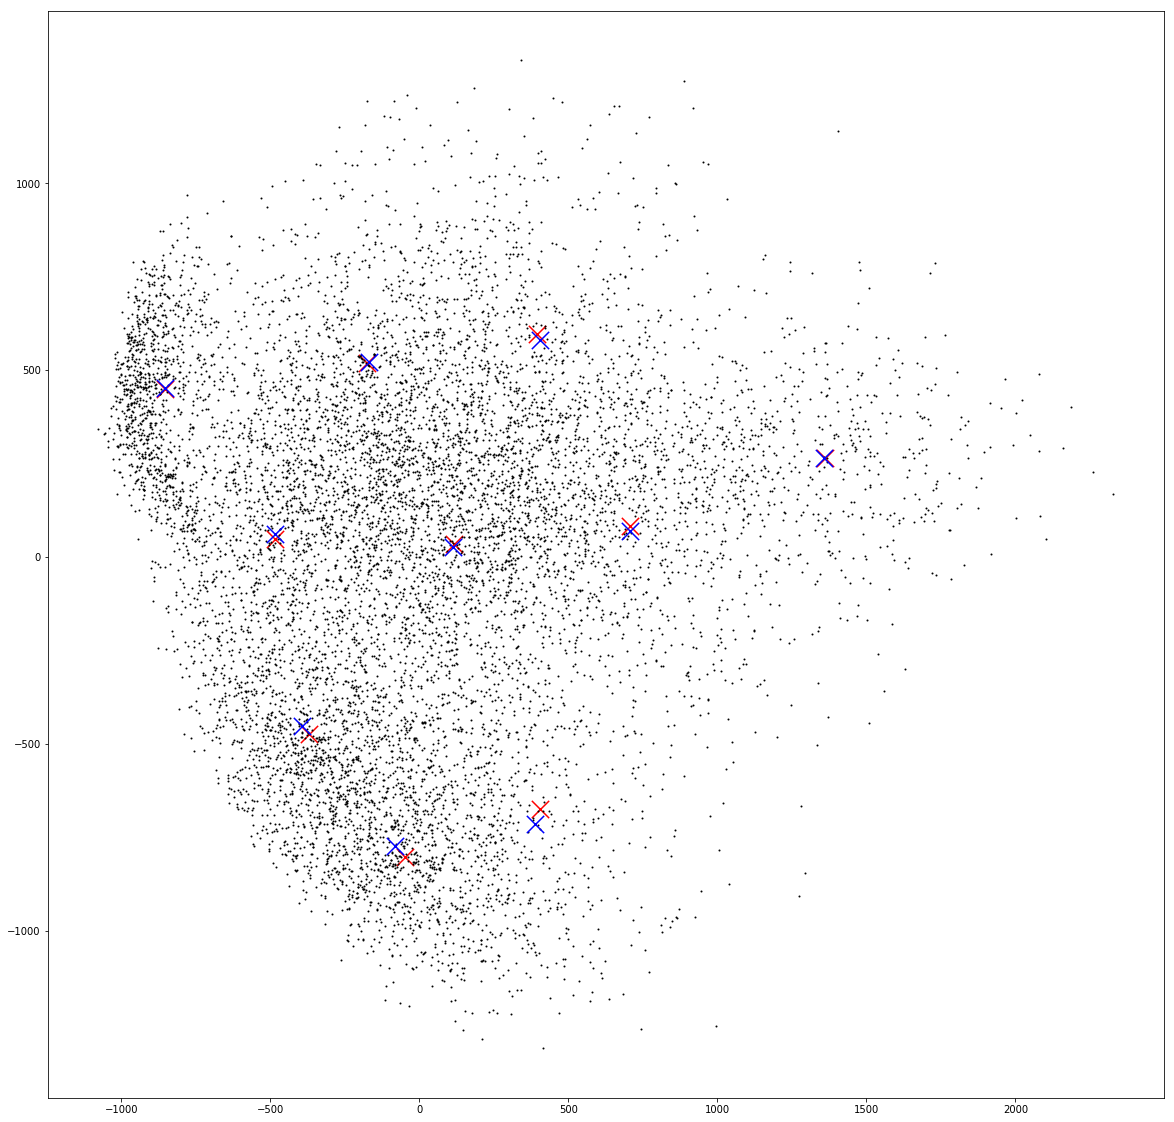

In [66]:
pyplot.figure(figsize=(20,20))
pyplot.scatter(new_centers[:, 0], new_centers[:, 1], color='red', linewidths=3, marker='x', s=300)

centroids = clf_kmeans.cluster_centers_
pyplot.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, linewidths=3, color='blue', zorder=10)


pyplot.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)